# Preparation

In [3]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")

In [4]:
import STAGATE

# Load Data

In [5]:
adata_list = {}

### Slide-seqV2

In [6]:
input_dir = 'G:/dataset/06-Mouse olfactory bulb/input/slide-seq/'
counts_file = os.path.join(input_dir, 'Puck_200127_15.digital_expression.txt')
coor_file = os.path.join(input_dir, 'Puck_200127_15_bead_locations.csv')

In [7]:
counts = pd.read_csv(counts_file, sep='\t', index_col=0)
# coor_df = pd.read_csv(coor_file, index_col=0)
coor_df = pd.read_csv(coor_file, index_col=3)
print(counts.shape, coor_df.shape)

(21220, 21724) (21724, 3)


In [13]:
adata = sc.AnnData(counts.T)
adata.var_names_make_unique()
coor_df = coor_df.loc[adata.obs_names, ['xcoord', 'ycoord']]
adata.obsm["spatial"] = coor_df.to_numpy()

In [14]:
sc.pp.calculate_qc_metrics(adata, inplace=True)
print(adata)

AnnData object with n_obs × n_vars = 21724 × 21220
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'


(-289.81710000000004, 6312.7151, 173.30850000000004, 5709.8615)

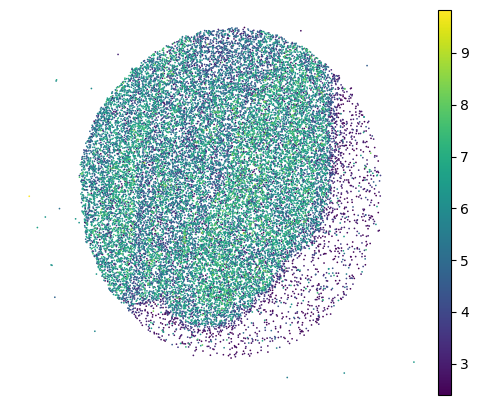

In [15]:
plt.rcParams["figure.figsize"] = (6,5)
sc.pl.embedding(adata, basis="spatial", color="log1p_total_counts",s=6, show=False)
plt.title('')
plt.axis('off')

In [18]:
# can be downloaded from https://drive.google.com/drive/folders/10lhz5VY7YfvHrtV40MwaqLmWz56U9eBP?usp=sharing
used_barcode = pd.read_csv(os.path.join(input_dir, 'used_barcodes.txt'), sep='\t', header=None)
used_barcode = used_barcode[0]
print(len(used_barcode))

20139


In [17]:
adata = adata[used_barcode,]
adata

View of AnnData object with n_obs × n_vars = 20139 × 21220
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    obsm: 'spatial'

(588.545, 5108.555, 847.6700000000001, 5670.73)

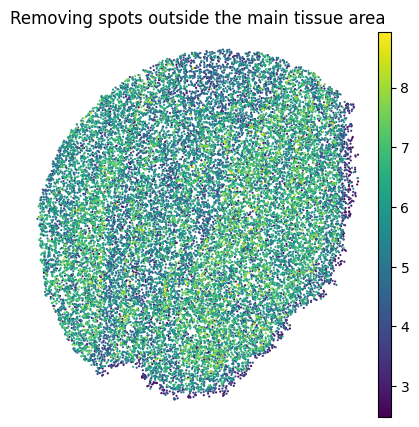

In [19]:
plt.rcParams["figure.figsize"] = (5,5)
sc.pl.embedding(adata, basis="spatial", color="log1p_total_counts",s=10, show=False, title='Removing spots outside the main tissue area')

plt.axis('off')

In [20]:
sc.pp.filter_genes(adata, min_cells=50)
print('After flitering: ', adata.shape)

After flitering:  (20139, 11750)


In [21]:
# make spot name unique
adata.obs_names = [x+'_SlideSeqV2' for x in adata.obs_names]

In [22]:
adata_list['SlideSeqV2'] = adata.copy()

### Stereo-seq

In [23]:
input_dir = 'G:/dataset/06-Mouse olfactory bulb/input/stereo-seq/'
counts_file = os.path.join(input_dir, 'RNA_counts.tsv')
coor_file = os.path.join(input_dir, 'position.tsv')

In [ ]:
counts = pd.read_csv(counts_file, sep='\t', index_col=0)
coor_df = pd.read_csv(coor_file, sep='\t')
print(counts.shape, coor_df.shape)

In [ ]:
counts.columns = ['Spot_'+str(x) for x in counts.columns]
coor_df.index = coor_df['label'].map(lambda x: 'Spot_'+str(x))
coor_df = coor_df.loc[:, ['x','y']]

In [ ]:
coor_df.head()

In [ ]:
adata = sc.AnnData(counts.T)
adata.var_names_make_unique()

In [ ]:
print(adata)

In [ ]:
coor_df = coor_df.loc[adata.obs_names, ['y', 'x']]
adata.obsm["spatial"] = coor_df.to_numpy()
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [ ]:
plt.rcParams["figure.figsize"] = (5,4)
sc.pl.embedding(adata, basis="spatial", color="n_genes_by_counts", show=False)
plt.title("")
plt.axis('off')

In [ ]:
used_barcode = pd.read_csv(os.path.join(input_dir, 'used_barcodes.txt'), sep='\t', header=None)
used_barcode = used_barcode[0]
adata = adata[used_barcode,]

print(adata)

In [ ]:
plt.rcParams["figure.figsize"] = (5,4)
sc.pl.embedding(adata, basis="spatial", color="n_genes_by_counts", show=False)
plt.title("")
plt.axis('off')

In [ ]:
sc.pp.filter_genes(adata, min_cells=50)
print('After flitering: ', adata.shape)

In [ ]:
# make spot name unique
adata.obs_names = [x+'_StereoSeq' for x in adata.obs_names]

In [ ]:
adata_list['StereoSeq'] = adata.copy()

# Constructing the spatial network for each secion

### Slide-seqV2

In [ ]:
STAGATE.Cal_Spatial_Net(adata_list['SlideSeqV2'], rad_cutoff=50)
STAGATE.Stats_Spatial_Net(adata_list['SlideSeqV2'])

In [ ]:
STAGATE.Cal_Spatial_Net(adata_list['StereoSeq'], rad_cutoff=50)
STAGATE.Stats_Spatial_Net(adata_list['StereoSeq'])

In [ ]:
adata_list['SlideSeqV2'].uns['Spatial_Net']

# Conbat the scanpy objects and spatial networks

In [ ]:
adata = sc.concat([adata_list['SlideSeqV2'], adata_list['StereoSeq']], keys=None)

In [ ]:
adata.uns['Spatial_Net'] = pd.concat([adata_list['SlideSeqV2'].uns['Spatial_Net'], adata_list['StereoSeq'].uns['Spatial_Net']])

In [ ]:
STAGATE.Stats_Spatial_Net(adata)

# Normalization

In [ ]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Running STAGATE

In [ ]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

In [ ]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)

In [ ]:
adata.obs['Tech'] = [x.split('_')[-1] for x in adata.obs_names]

In [ ]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color='Tech', title='Unintegrated')

# save embedding

In [ ]:
# save embedding
np.savetxt(output_dir + experiment_name + '_STAGATE.csv', adata.obsm['STAGATE'], delimiter=",")

In [1]:
try:   
    !jupyter nbconvert --to python MouseOB_STAGATE_origin.ipynb
    # python即转化为.py，script即转化为.html
    # file_name.ipynb即当前module的文件名
except:
    pass

[NbConvertApp] Converting notebook MouseOB_STAGATE_origin.ipynb to python
[NbConvertApp] Writing 5106 bytes to MouseOB_STAGATE_origin.py
